Supply Chain Optimization and Analysis

Project Overview
This project focuses on analyzing and optimizing supply chain operations using a dataset that includes information about product types, sales, stock levels, and other relevant factors. The primary objectives are to:

Analyze Data: Understand the relationships between various supply chain factors and their impact on revenue.
Build Predictive Models: Use machine learning techniques to predict revenue based on input features.
Optimize Costs: Apply linear programming to minimize costs under given constraints.
Visualize Results: Create an interactive dashboard to visualize revenue and other key metrics.

Import Libraries and Load Data

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv(r'C:\Users\Gizem Görünmez\Desktop\supply_chain_data.csv')


Data Preprocessing

In [41]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Handle missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Convert categorical columns to numeric if needed
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col].astype(str))


Correlation Heatmap

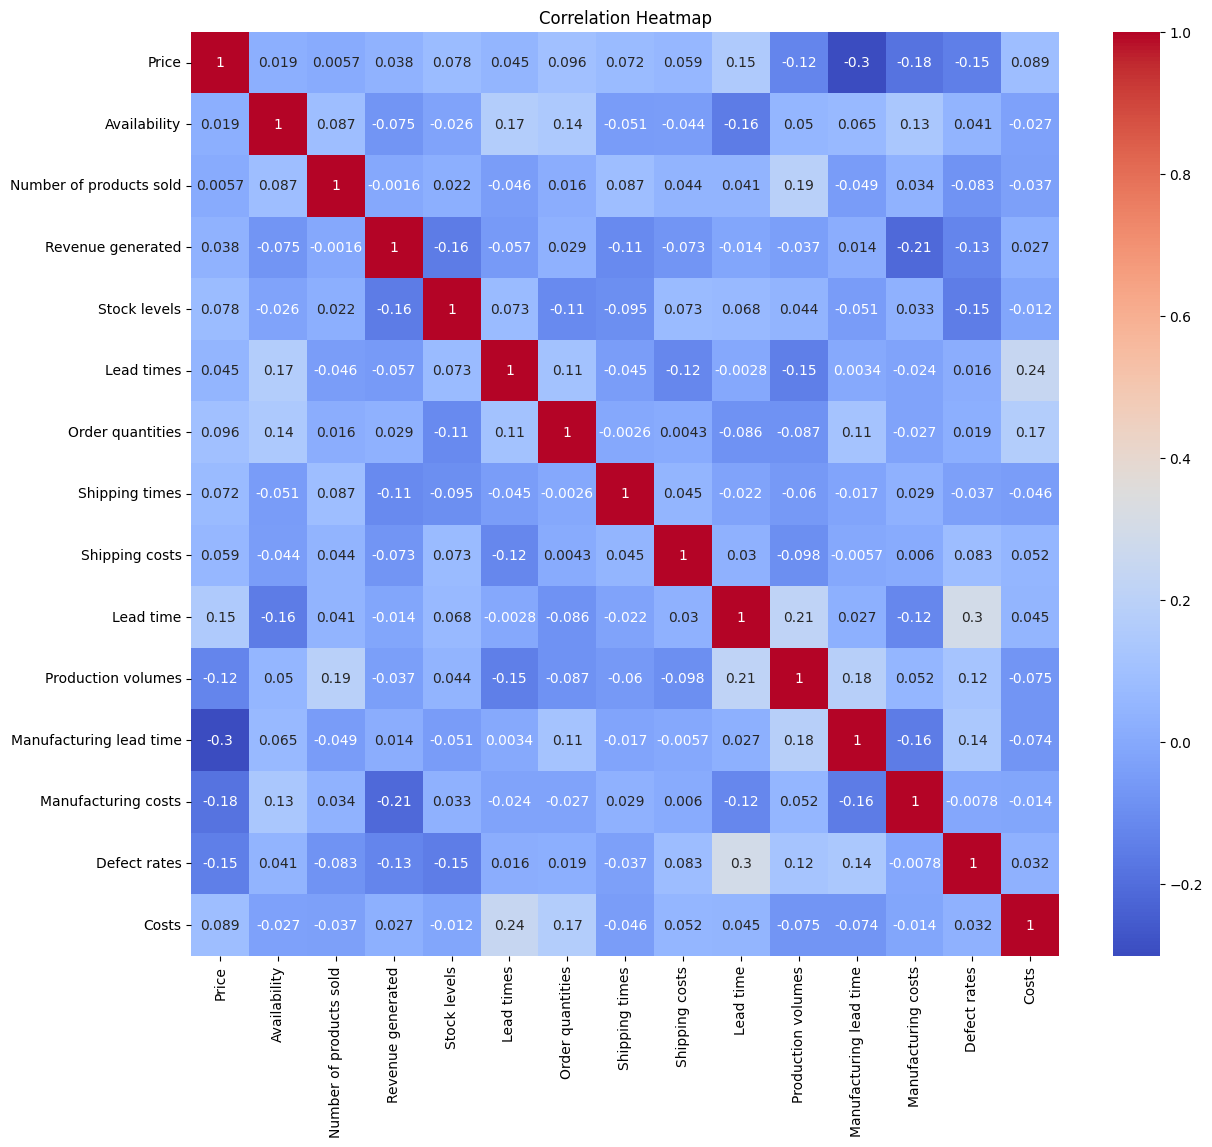

In [42]:
# Compute correlation matrix
correlation = data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Train a Random Forest Model

In [43]:
# Define features and target
features = data.drop(['Revenue generated'], axis=1)
target = data['Revenue generated']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 9550764.101039082


Optimization with Linear Programming

In [44]:
from scipy.optimize import linprog

# Example cost coefficients and constraints
c = [data['Costs'].mean()]  # Cost per unit
A = [[1]]  # Constraints matrix (example)
b = [data['Stock levels'].mean()]  # Constraint value (example)

# Solve the optimization problem
result = linprog(c, A_ub=A, b_ub=b, method='simplex')

print("Optimal Order Quantity:", result.x)
print("Minimum Cost:", result.fun)


Optimal Order Quantity: [0.]
Minimum Cost: 0.0


C:\Users\Gizem Görünmez\AppData\Local\Temp\ipykernel_10344\1849548737.py:9: DeprecationWarning:

`method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.



Interactive Dashboard with Dash

In [45]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Initialize the app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Supply Chain Optimization Dashboard"),
    dcc.Graph(id='revenue-graph'),
    dcc.Interval(id='interval-component', interval=1*1000, n_intervals=0)
])

@app.callback(Output('revenue-graph', 'figure'), [Input('interval-component', 'n_intervals')])
def update_graph(n):
    fig = go.Figure()
    fig.add_trace(go.Bar(x=data['Product type'], y=data['Revenue generated'], name='Revenue by Product Type'))
    fig.update_layout(title='Revenue by Product Type', xaxis_title='Product Type', yaxis_title='Revenue')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
